# Predictions with Small Dataset

## I. Import Dataset

In [1]:
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Loading the data
df = pd.read_csv('clean data/Top 1000 IMDb movies.csv')

sns.set(rc={'figure.figsize':(20,5)})

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   Movie_Name        1000 non-null   object 
 2   Year_of_Release   1000 non-null   int64  
 3   C_Rating          984 non-null    object 
 4   Watch_Time_(min)  1000 non-null   int64  
 5   Genre             1000 non-null   object 
 6   Movie_Rating      1000 non-null   float64
 7   Metascore         844 non-null    float64
 8   Votes             1000 non-null   int64  
 9   Gross_($M)        814 non-null    float64
 10  Description       1000 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


In [3]:
df.head(20)

,Unnamed: 0,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description
0,0,The Shawshank Redemption,1994,R,142,Drama,9.3,82.0,2735235,28.34,"Over the course of several years, two convicts..."
1,1,The Godfather,1972,R,175,"Crime, Drama",9.2,100.0,1902109,134.97,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,84.0,2708419,534.86,When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,R,195,"Biography, Drama, History",9.0,95.0,1380843,96.90,"In German-occupied Poland during World War II,..."
4,4,The Lord of the Rings: The Return of the King,2003,PG-13,201,"Action, Adventure, Drama",9.0,94.0,1881383,377.85,Gandalf and Aragorn lead the World of Men agai...
5,5,12 Angry Men,1957,Approved,96,"Crime, Drama",9.0,97.0,809518,4.36,The jury in a New York City murder trial is fr...
6,6,The Godfather Part II,1974,R,202,"Crime, Drama",9.0,90.0,1296679,57.30,The early life and career of Vito Corleone in ...
7,7,Pulp Fiction,1994,R,154,"Crime, Drama",8.9,95.0,2101929,107.93,"The lives of two mob hitmen, a boxer, a gangst..."
8,8,Inception,2010,PG-13,148,"Action, Adventure, Sci-Fi",8.8,74.0,2404179,292.58,A thief who steals corporate secrets through t...
9,9,Fight Club,1999,R,139,Drama,8.8,66.0,2177808,37.03,An insomniac office worker and a devil-may-car...


In [4]:
df.isnull().sum()

Unnamed: 0            0
Movie_Name            0
Year_of_Release       0
C_Rating             16
Watch_Time_(min)      0
Genre                 0
Movie_Rating          0
Metascore           156
Votes                 0
Gross_($M)          186
Description           0
dtype: int64

## II. Features Engineering

### 1. Create New Features

In [5]:
genre_1 = []
genre_2 = []
genre_3 = []

for genres in df['Genre']:
    genre_1.append(genres.split(',')[0].strip() if len(genres.split(',')) >= 1 else np.nan)
    genre_2.append(genres.split(',')[1].strip() if len(genres.split(',')) >= 2 else np.nan)
    genre_3.append(genres.split(',')[2].strip() if len(genres.split(',')) >= 3 else np.nan)
    
df['Genre_1'] = genre_1
df['Genre_2'] = genre_2
df['Genre_3'] = genre_3

Text(0.5, 1.0, 'Genre_3')

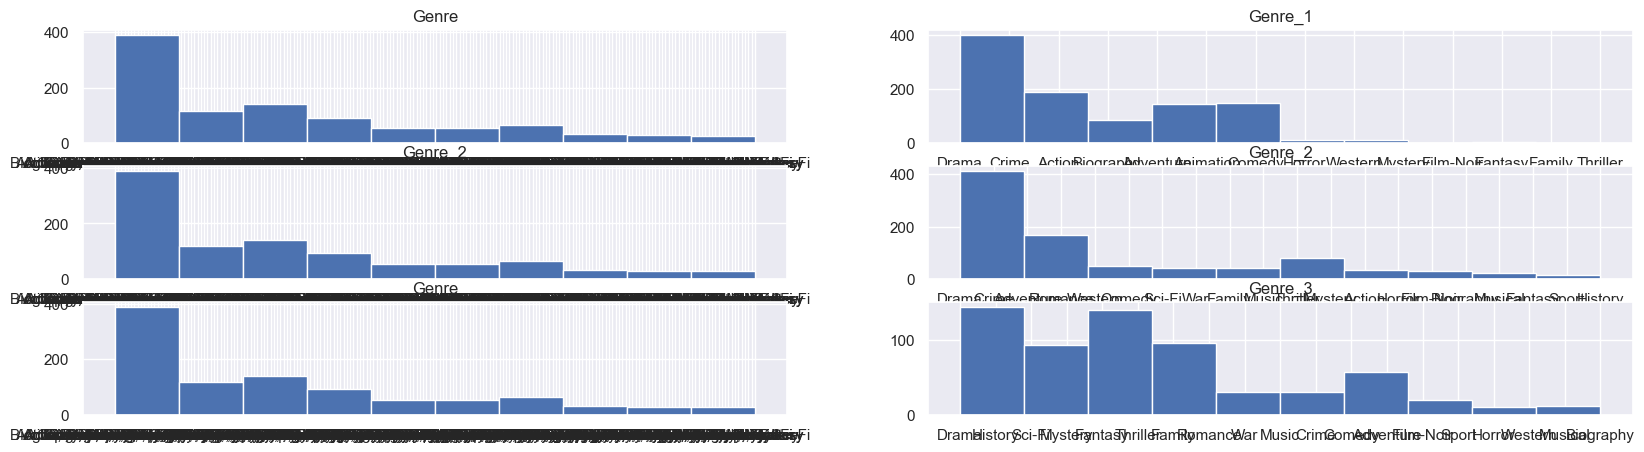

In [6]:
f, a = plt.subplots(3,2)

a[0, 0].hist(df['Genre'])
a[0, 0].set_title('Genre')


a[0, 1].hist(df['Genre_1'])
a[0, 1].set_title('Genre_1')


a[1, 0].hist(df['Genre'])
a[1, 0].set_title('Genre_2')


a[1, 1].hist(df['Genre_2'].dropna())
a[1, 1].set_title('Genre_2')


a[2, 0].hist(df['Genre'])
a[2, 0].set_title('Genre')


a[2, 1].hist(df['Genre_3'].dropna())
a[2, 1].set_title('Genre_3')

<AxesSubplot:>

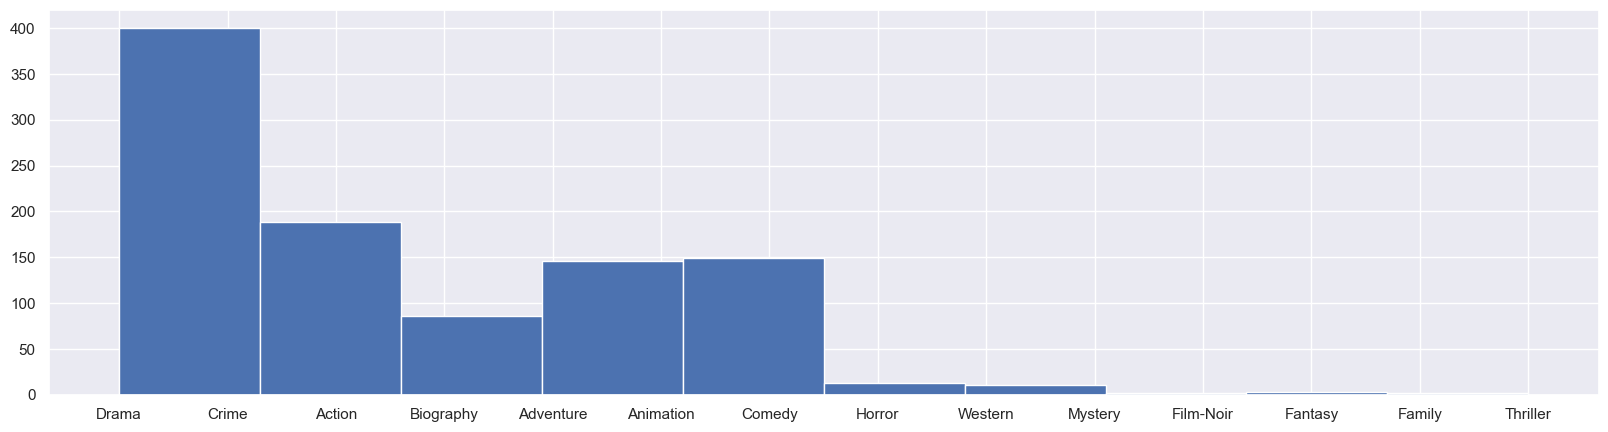

In [7]:
df['Genre_1'].hist()

### 2. Data Cleaning

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.dropna(axis=0,subset=['C_Rating'],inplace=True)

### 3. Missing Value Imputation

#### Metascore

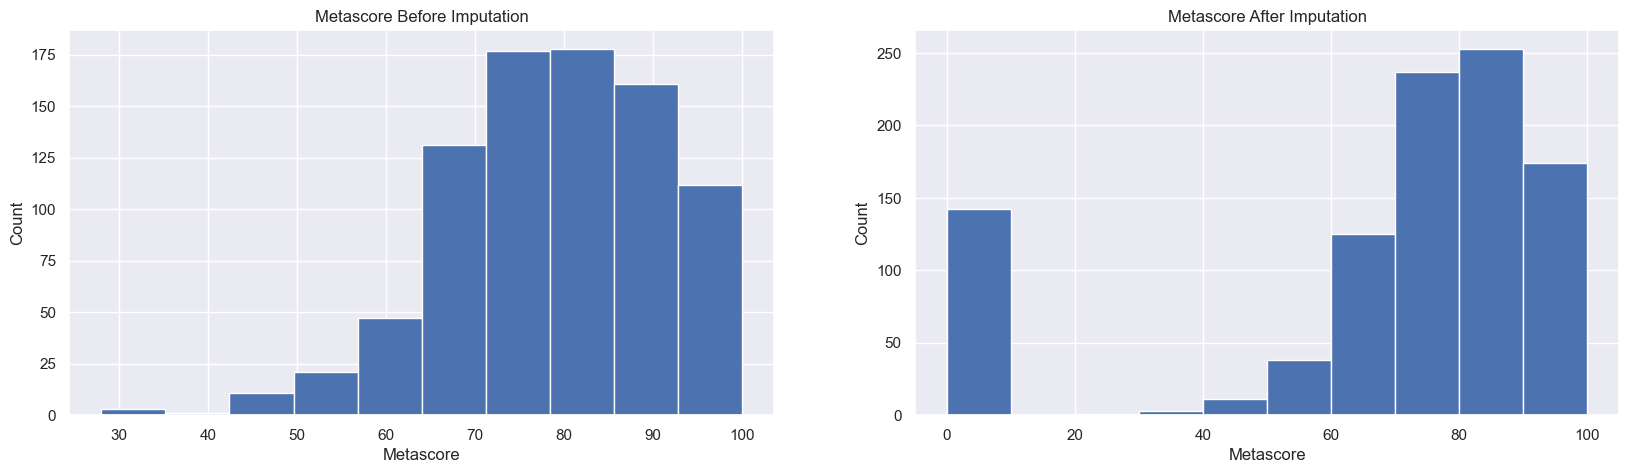

In [11]:
figure, axis = plt.subplots(1, 2)

#Metascore 
axis[0].hist(df['Metascore'])
axis[0].set_title('Metascore Before Imputation')
axis[0].set_xlabel('Metascore')
axis[0].set_ylabel('Count')



axis[1].hist(df['Metascore'].fillna(0))
axis[1].set_title('Metascore After Imputation')
axis[1].set_xlabel('Metascore')
axis[1].set_ylabel('Count')



plt.show()

In [12]:
df['Metascore'] = df['Metascore'].fillna(0)

#### Gross

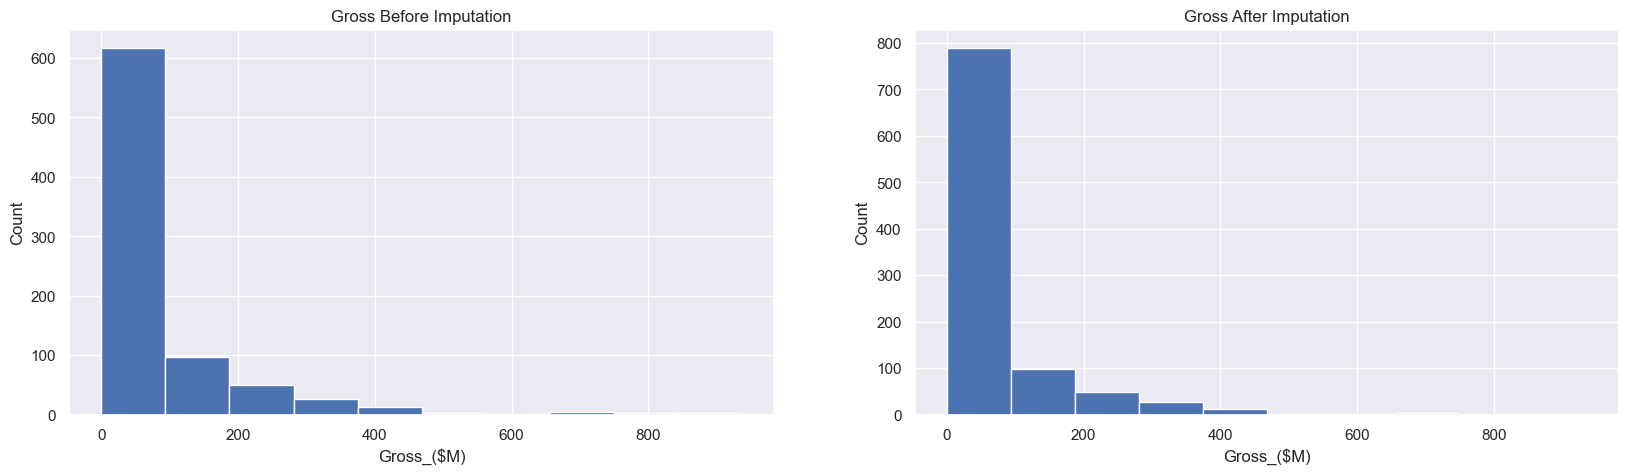

In [13]:
figure, axis = plt.subplots(1, 2)

#Metascore 
axis[0].hist(df['Gross_($M)'])
axis[0].set_title('Gross Before Imputation')
axis[0].set_xlabel('Gross_($M)')
axis[0].set_ylabel('Count')



axis[1].hist(df['Gross_($M)'].fillna(df['Gross_($M)'].median()))
axis[1].set_title('Gross After Imputation')
axis[1].set_xlabel('Gross_($M)')
axis[1].set_ylabel('Count')



plt.show()

In [14]:
df['Gross_($M)'] =  df['Gross_($M)'].fillna(df['Gross_($M)'].median())

#### Genre_1, Genre_2, Genre_3

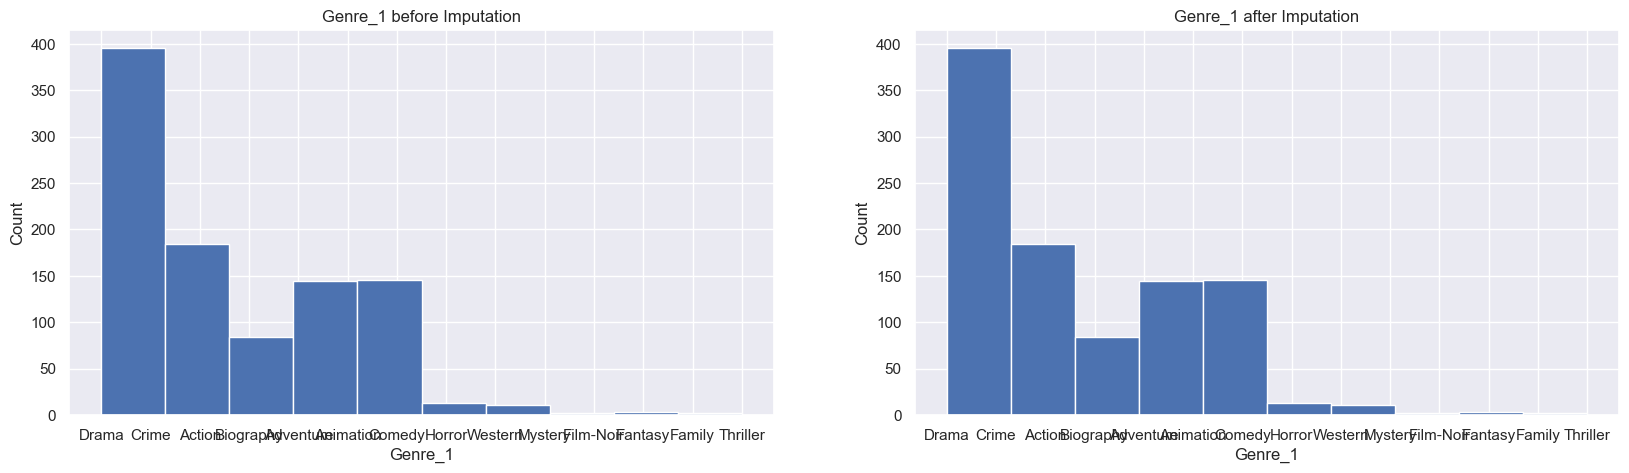

In [15]:
figure, axis = plt.subplots(1, 2)


axis[0].hist(df['Genre_1'])
axis[0].set_title('Genre_1 before Imputation')
axis[0].set_xlabel('Genre_1')
axis[0].set_ylabel('Count')

random_samples = df['Genre_1'].dropna().sample(n=df['Genre_1'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_1'].isnull()].index
df.loc[df['Genre_1'].isnull(), 'Genre_1']=random_samples

axis[1].hist(df['Genre_1'])
axis[1].set_title('Genre_1 after Imputation')
axis[1].set_xlabel('Genre_1')
axis[1].set_ylabel('Count')

plt.show()


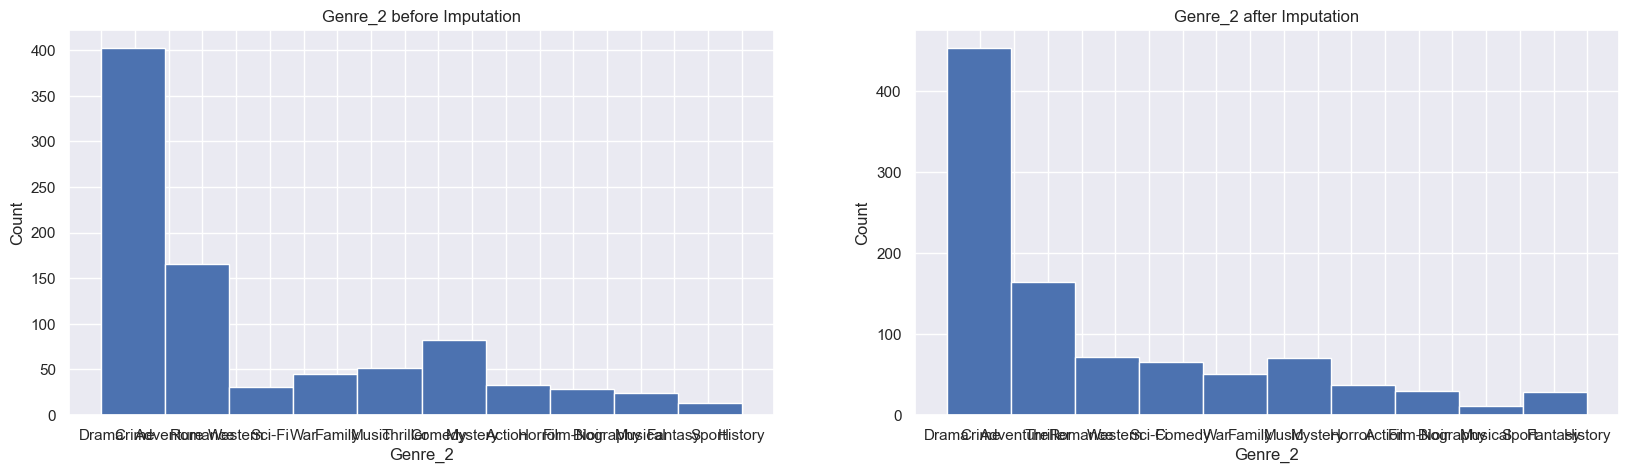

In [16]:
figure, axis = plt.subplots(1, 2)

axis[0].hist(df['Genre_2'].dropna())
axis[0].set_title('Genre_2 before Imputation')
axis[0].set_xlabel('Genre_2')
axis[0].set_ylabel('Count')

random_samples = df['Genre_2'].dropna().sample(n=df['Genre_2'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_2'].isnull()].index
df.loc[df['Genre_2'].isnull(), 'Genre_2']=random_samples

axis[1].hist(df['Genre_2'])
axis[1].set_title('Genre_2 after Imputation')
axis[1].set_xlabel('Genre_2')
axis[1].set_ylabel('Count')

plt.show()

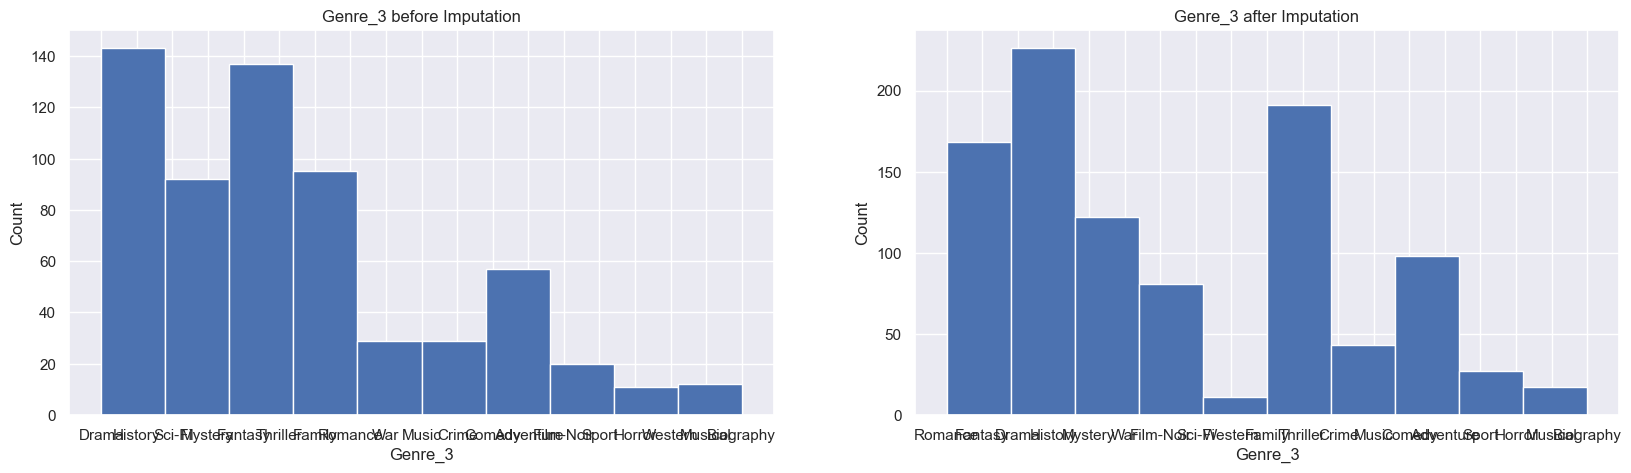

In [17]:
figure, axis = plt.subplots(1, 2)

axis[0].hist(df['Genre_3'].dropna())
axis[0].set_title('Genre_3 before Imputation')
axis[0].set_xlabel('Genre_3')
axis[0].set_ylabel('Count')

random_samples = df['Genre_3'].dropna().sample(n=df['Genre_3'].isnull().sum(),random_state=0)
random_samples.index = df[df['Genre_3'].isnull()].index
df.loc[df['Genre_3'].isnull(), 'Genre_3']=random_samples

axis[1].hist(df['Genre_3'])
axis[1].set_title('Genre_3 after Imputation')
axis[1].set_xlabel('Genre_3')
axis[1].set_ylabel('Count')


plt.show()

### 4. Label Encoding

In [18]:
le = preprocessing.LabelEncoder()

#### Movie_Name

In [19]:
df['Movie_Name'] = le.fit_transform(df['Movie_Name'])

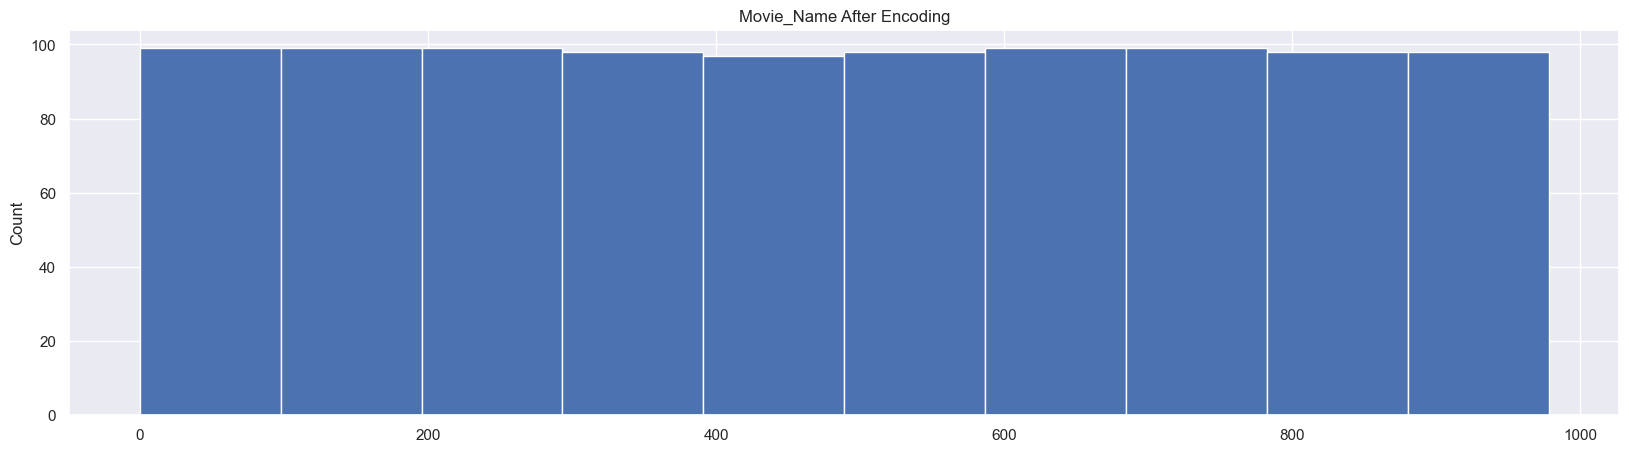

In [20]:
plt.hist(df['Movie_Name'])
plt.title('Movie_Name After Encoding')
plt.ylabel('Count')
plt.show()

#### C_Rating

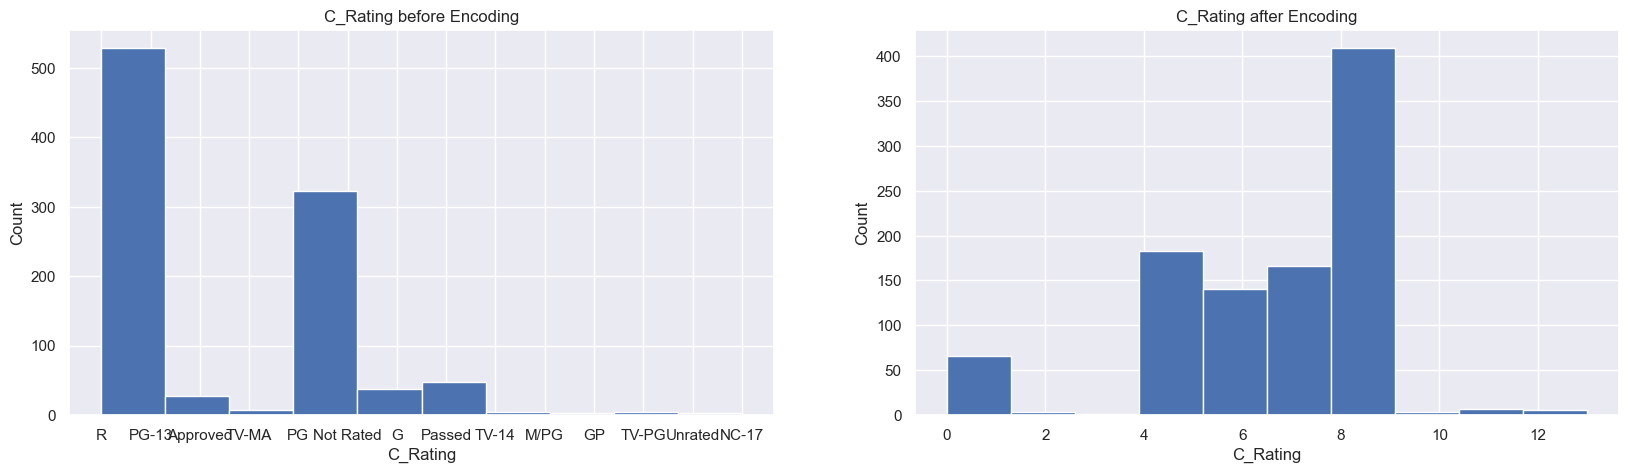

In [21]:
figure, axis = plt.subplots(1, 2)

axis[0].hist(df['C_Rating'])
axis[0].set_title('C_Rating before Encoding')
axis[0].set_xlabel('C_Rating')
axis[0].set_ylabel('Count')


axis[1].hist(le.fit_transform(df['C_Rating']))
axis[1].set_title('C_Rating after Encoding')
axis[1].set_xlabel('C_Rating')
axis[1].set_ylabel('Count')

plt.show()

In [22]:
df['C_Rating'] = le.fit_transform(df['C_Rating'])

#### Genre

In [23]:
df['Genre'] = le.fit_transform(df['Genre'])

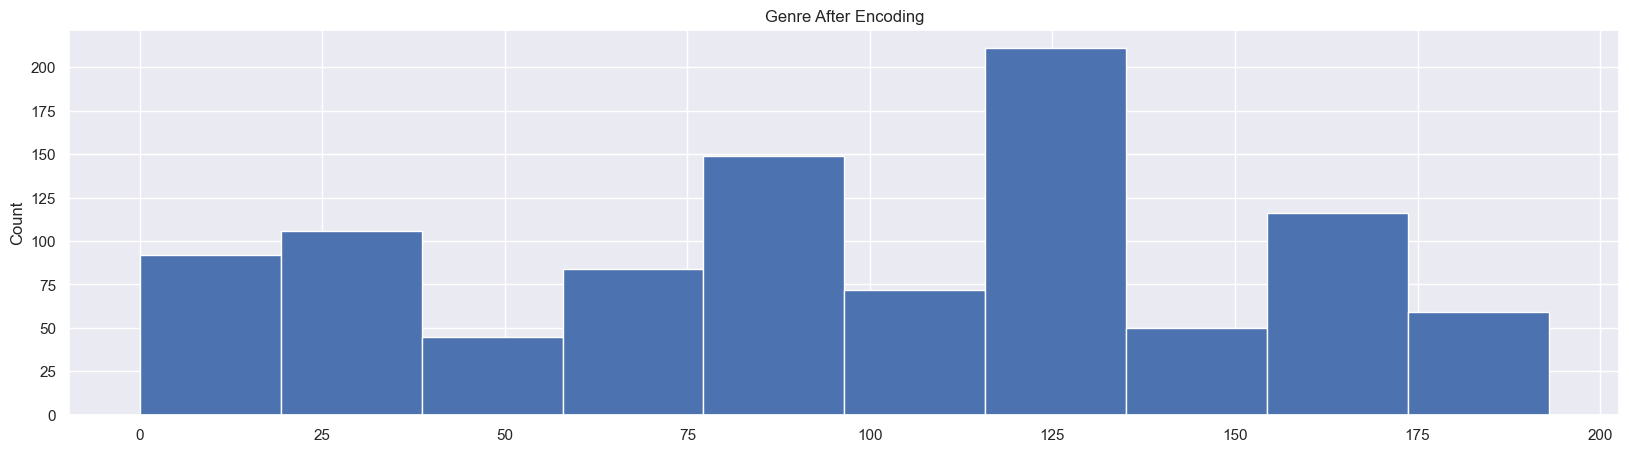

In [24]:
plt.hist(df['Genre'])
plt.title('Genre After Encoding')
plt.ylabel('Count')
plt.show()

#### Description

In [25]:
df['Description'] = le.fit_transform(df['Description'])

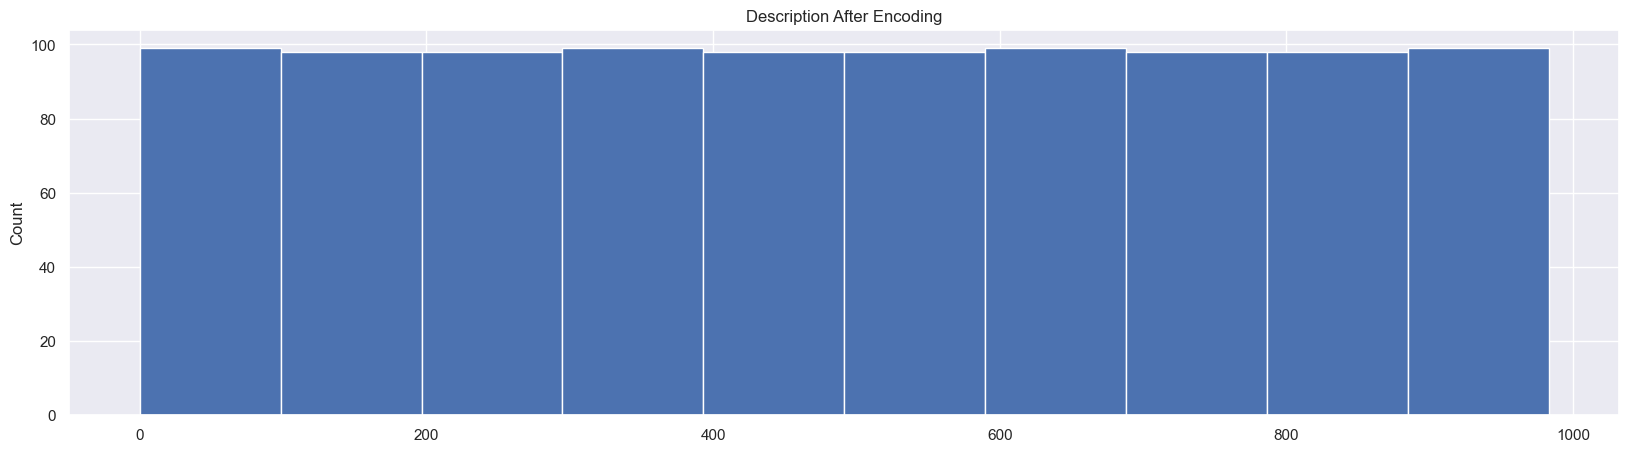

In [26]:
plt.hist(df['Description'])
plt.title('Description After Encoding')
plt.ylabel('Count')
plt.show()

#### Genre_1, Genre_2, Genre_3

In [27]:
df['Genre_1'] = le.fit_transform(df['Genre_1'])
df['Genre_2'] = le.fit_transform(df['Genre_2'])
df['Genre_3'] = le.fit_transform(df['Genre_3'])

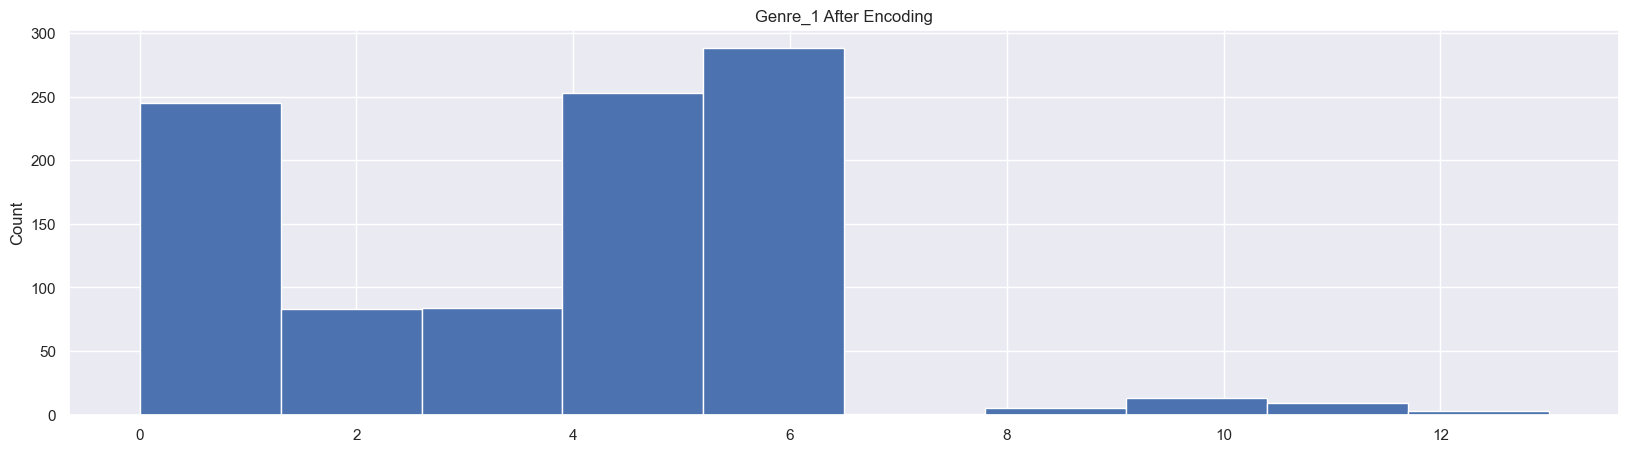

In [28]:
plt.hist(df['Genre_1'])
plt.title('Genre_1 After Encoding')
plt.ylabel('Count')
plt.show()

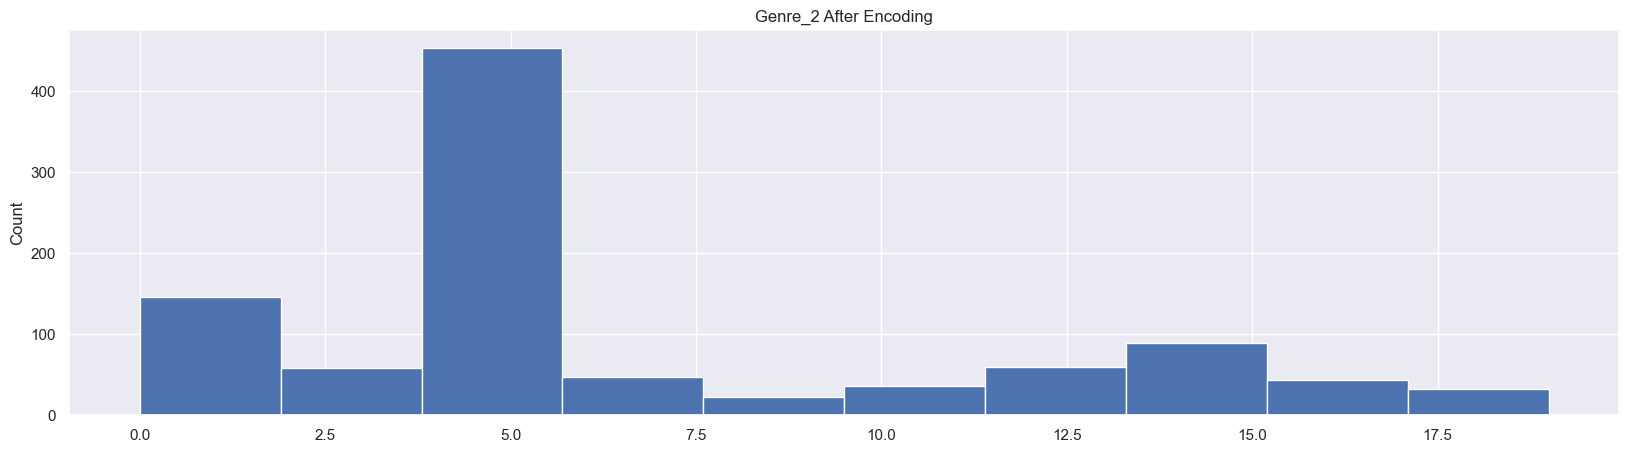

In [29]:
plt.hist(df['Genre_2'])
plt.title('Genre_2 After Encoding')
plt.ylabel('Count')
plt.show()

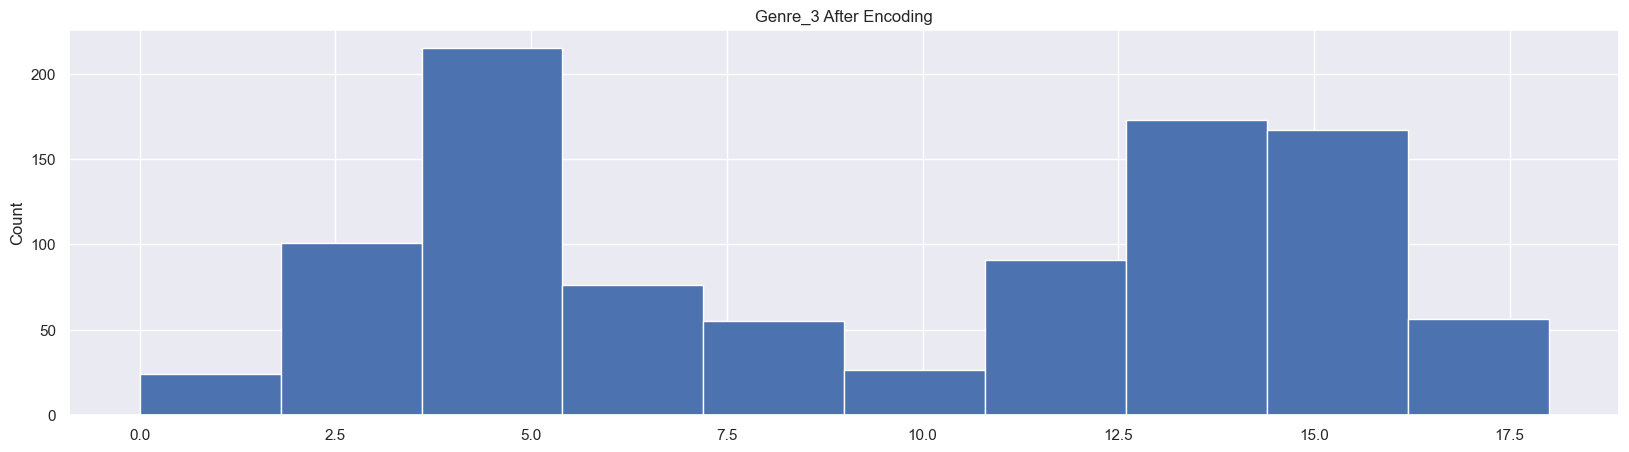

In [30]:
plt.hist(df['Genre_3'])
plt.title('Genre_3 After Encoding')
plt.ylabel('Count')
plt.show()

### 5. Outliers

In [31]:
df_outliers = df.copy()

#### Watch Time

37.89089597410302
210.04609589581568


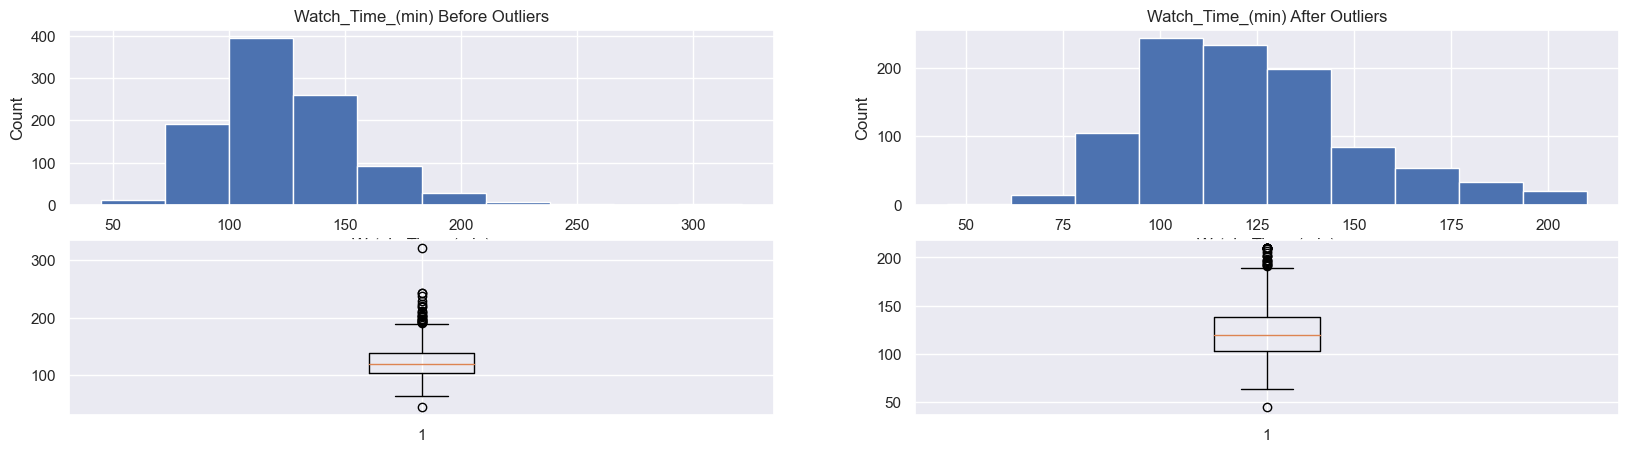

In [32]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].hist(df['Watch_Time_(min)'])
axis[0, 0].set_title('Watch_Time_(min) Before Outliers')
axis[0, 0].set_xlabel('Watch_Time_(min)')
axis[0, 0].set_ylabel('Count')


uppper_boundary=df_outliers['Watch_Time_(min)'].mean() + 3* df_outliers['Watch_Time_(min)'].std()
lower_boundary=df_outliers['Watch_Time_(min)'].mean() - 3* df_outliers['Watch_Time_(min)'].std()
print(lower_boundary), print(uppper_boundary)

df_outliers.loc[df_outliers['Watch_Time_(min)']>=uppper_boundary, 'Watch_Time_(min)']=uppper_boundary
df_outliers.loc[df_outliers['Watch_Time_(min)']<=lower_boundary, 'Watch_Time_(min)']=lower_boundary

axis[0, 1].hist(df_outliers['Watch_Time_(min)'])
axis[0, 1].set_title('Watch_Time_(min) After Outliers')
axis[0, 1].set_xlabel('Watch_Time_(min)')
axis[0, 1].set_ylabel('Count')

axis[1, 0].boxplot(df['Watch_Time_(min)'])
axis[1, 1].boxplot(df_outliers['Watch_Time_(min)'])


plt.show()

#### Votes

-1075309.25
1580713.0


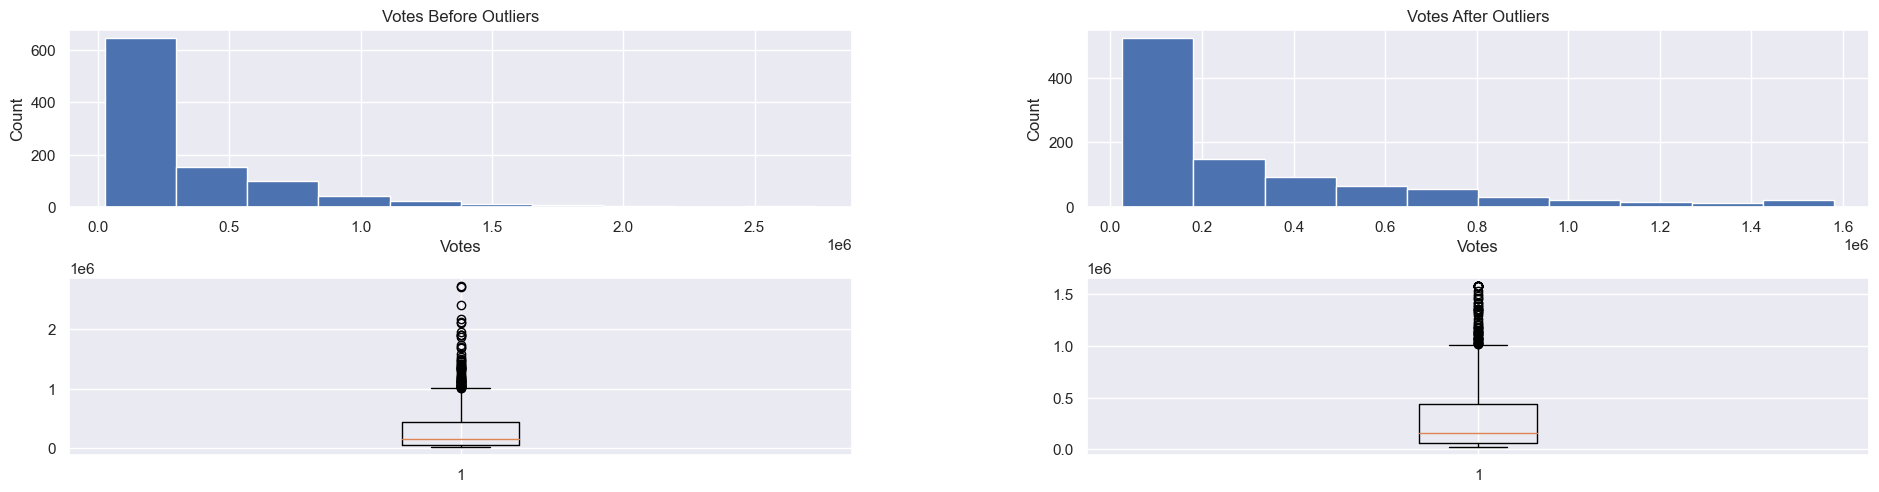

In [33]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].hist(df['Votes'])
axis[0, 0].set_title('Votes Before Outliers')
axis[0, 0].set_xlabel('Votes')
axis[0, 0].set_ylabel('Count')


IQR=df_outliers.Votes.quantile(0.75)-df_outliers.Votes.quantile(0.25)
lower_bridge=df_outliers['Votes'].quantile(0.25)-(IQR*3)
upper_bridge=df_outliers['Votes'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

df_outliers.loc[df_outliers['Votes']>=upper_bridge,'Votes']=upper_bridge
df_outliers.loc[df_outliers['Votes']<=lower_bridge,'Votes']=lower_bridge

axis[0, 1].hist(df_outliers['Votes'])
axis[0, 1].set_title('Votes After Outliers')
axis[0, 1].set_xlabel('Votes')
axis[0, 1].set_ylabel('Count')

axis[1, 0].boxplot(df['Votes'])
axis[1, 1].boxplot(df_outliers['Votes'])

figure.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

#### Gross

-171.04
239.6325


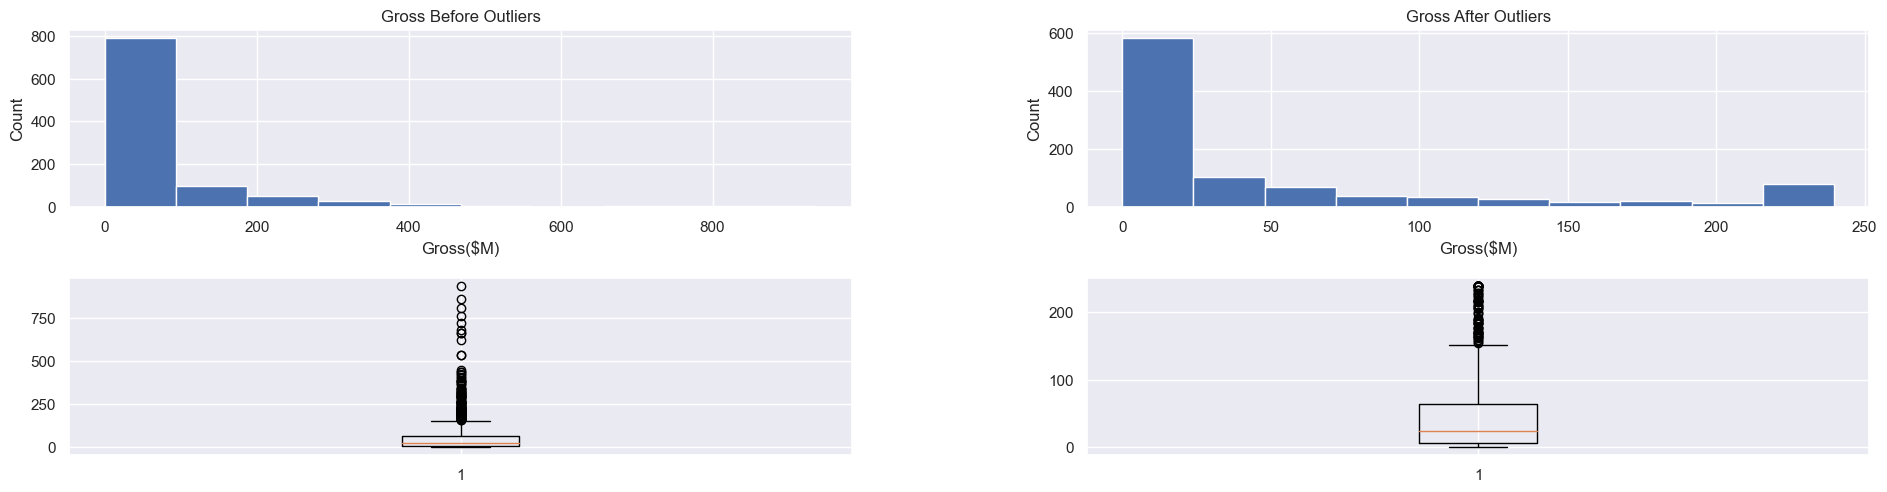

In [34]:
figure, axis = plt.subplots(2, 2)

axis[0, 0].hist(df['Gross_($M)'])
axis[0, 0].set_title('Gross Before Outliers')
axis[0, 0].set_xlabel('Gross($M)')
axis[0, 0].set_ylabel('Count')


IQR=df_outliers['Gross_($M)'].quantile(0.75)-df_outliers['Gross_($M)'].quantile(0.25)
lower_bridge=df_outliers['Gross_($M)'].quantile(0.25)-(IQR*3)
upper_bridge=df_outliers['Gross_($M)'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

df_outliers.loc[df_outliers['Gross_($M)']>=upper_bridge,'Gross_($M)']=upper_bridge
df_outliers.loc[df_outliers['Gross_($M)']<=lower_bridge,'Gross_($M)']=lower_bridge

axis[0, 1].hist(df_outliers['Gross_($M)'])
axis[0, 1].set_title('Gross After Outliers')
axis[0, 1].set_xlabel('Gross($M)')
axis[0, 1].set_ylabel('Count')

axis[1, 0].boxplot(df['Gross_($M)'])
axis[1, 1].boxplot(df_outliers['Gross_($M)'])

figure.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

### 6. Feature selection

In [35]:
features = ['Movie_Name','Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Genre' , 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_1', 'Genre_2', 'Genre_3']
X = df_outliers[features]
y = df_outliers['Movie_Rating']

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(f_regression, k='all').fit(X, y)
selector.scores_.round(0)

array([  0.,   9.,   9.,  77.,   0.,   1., 284.,   6.,   2.,   0.,   1.,
         0.])

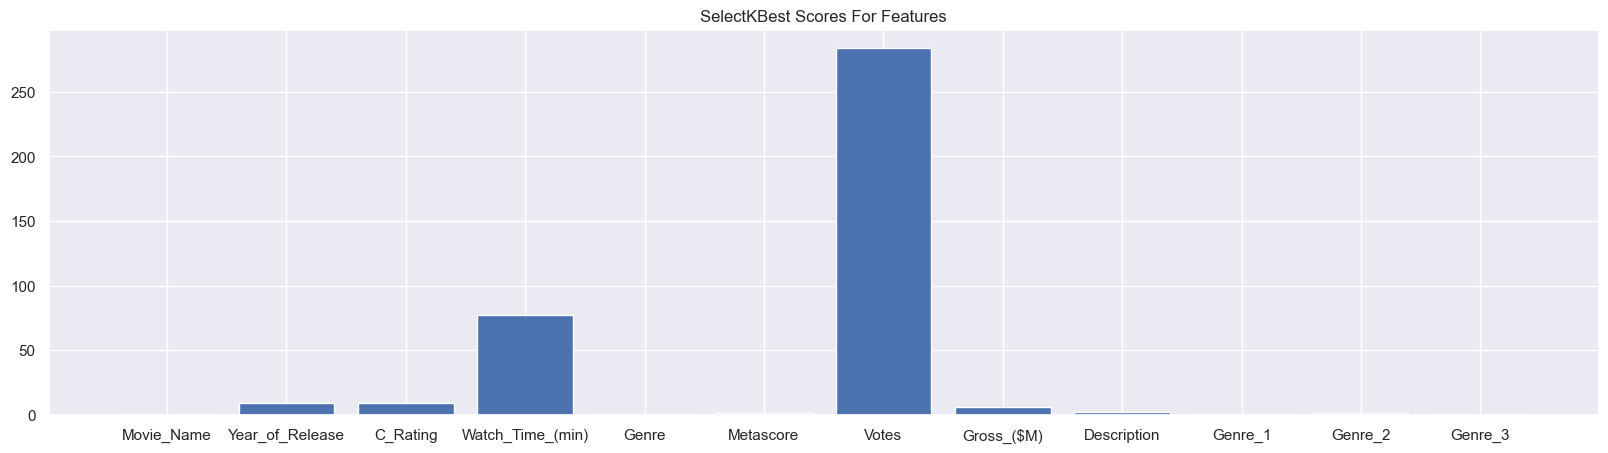

In [37]:
x = np.array(['Movie_Name','Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Genre' , 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_1', 'Genre_2', 'Genre_3'])
y = np.array(selector.scores_.round(0))

plt.bar(x,y)
plt.title('SelectKBest Scores For Features')
plt.show()

In [38]:
features = ['Year_of_Release', 'C_Rating', 'Watch_Time_(min)', 'Metascore', 'Votes', 'Gross_($M)', 'Description', 'Genre_2']
X = df_outliers[features]
y = df_outliers['Movie_Rating']

### 7. Feature Scaling

In [39]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_scale = scaler.fit_transform(X)
X_scale

array([[-0.14285714,  0.5       ,  0.62857143, ...,  0.08326586,
         0.48524924,  0.        ],
       [-0.77142857,  0.5       ,  1.57142857, ...,  1.90079686,
         0.58697864,  0.        ],
       [ 0.25714286,  0.        ,  0.91428571, ...,  3.68479141,
         0.94710071, -0.16666667],
       ...,
       [-0.08571429,  0.        , -0.42857143, ...,  0.2105936 ,
         0.49542218,  0.        ],
       [ 0.22857143,  0.5       ,  0.05714286, ..., -0.38496612,
        -0.56459817,  0.        ],
       [-1.88571429,  1.25      , -1.4       , ...,  0.        ,
        -0.50559512,  1.66666667]])

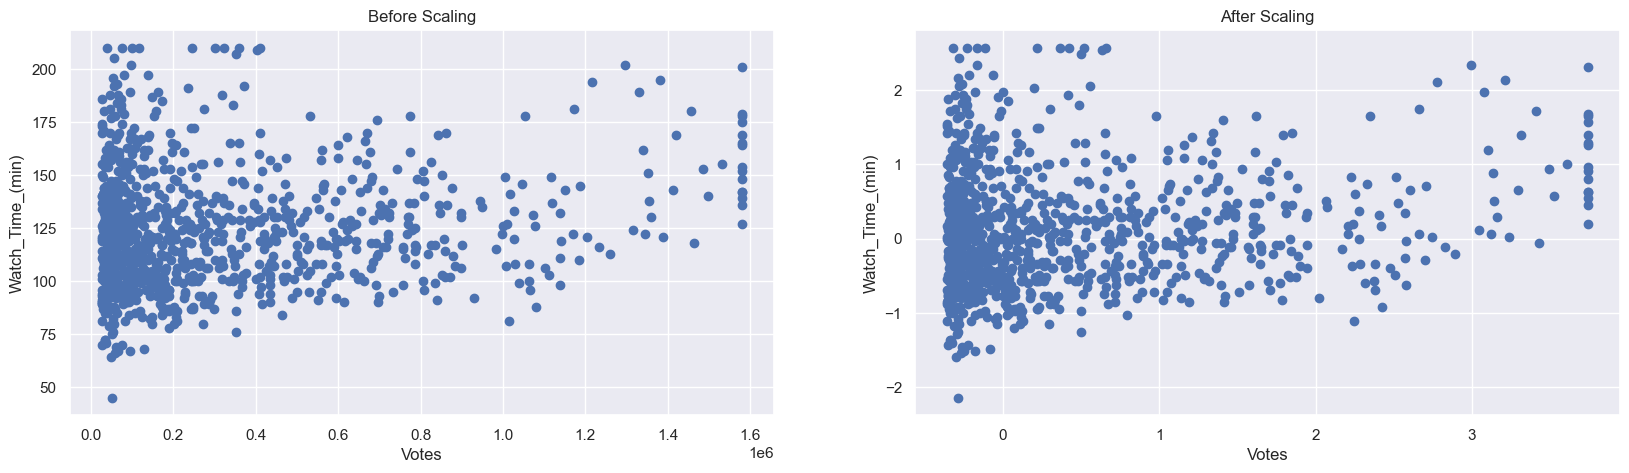

In [40]:
fig, axis = plt.subplots(1,2)

axis[0].scatter(X['Votes'], X['Watch_Time_(min)'])
axis[0].set_title('Before Scaling')
axis[0].set_xlabel('Votes')
axis[0].set_ylabel('Watch_Time_(min)')

axis[1].scatter(X_scale[: ,4], X_scale[: ,2])
axis[1].set_title('After Scaling')
axis[1].set_xlabel('Votes')
axis[1].set_ylabel('Watch_Time_(min)')

plt.show()

## III. Data Visualization

In [41]:
df_outliers.head(20)

,Movie_Name,Year_of_Release,C_Rating,Watch_Time_(min),Genre,Movie_Rating,Metascore,Votes,Gross_($M),Description,Genre_1,Genre_2,Genre_3
0,854,1994,9,142.0,133,9.3,82.0,1580713.0,28.3400,730,6,5,13
1,746,1972,9,175.0,120,9.2,100.0,1580713.0,134.9700,780,5,5,6
2,718,2008,7,152.0,20,9.0,84.0,1580713.0,239.6325,957,0,4,4
3,599,1993,9,195.0,84,9.0,95.0,1380843.0,96.9000,623,3,5,8
4,800,2003,7,201.0,4,9.0,94.0,1580713.0,239.6325,585,0,1,4
5,0,1957,0,96.0,120,9.0,97.0,809518.0,4.3600,801,5,5,12
6,747,1974,9,202.0,120,9.0,90.0,1296679.0,57.3000,793,5,5,17
7,554,1994,9,154.0,120,8.9,95.0,1580713.0,107.9300,812,5,5,7
8,352,2010,7,148.0,9,8.8,74.0,1580713.0,239.6325,298,0,1,14
9,258,1999,9,139.0,133,8.8,66.0,1580713.0,37.0300,471,6,17,4


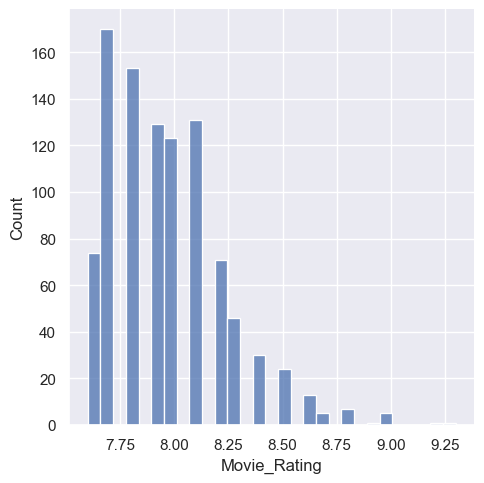

In [42]:
sns.displot(df_outliers, x="Movie_Rating")

<AxesSubplot:xlabel='Movie_Rating', ylabel='Gross_($M)'>

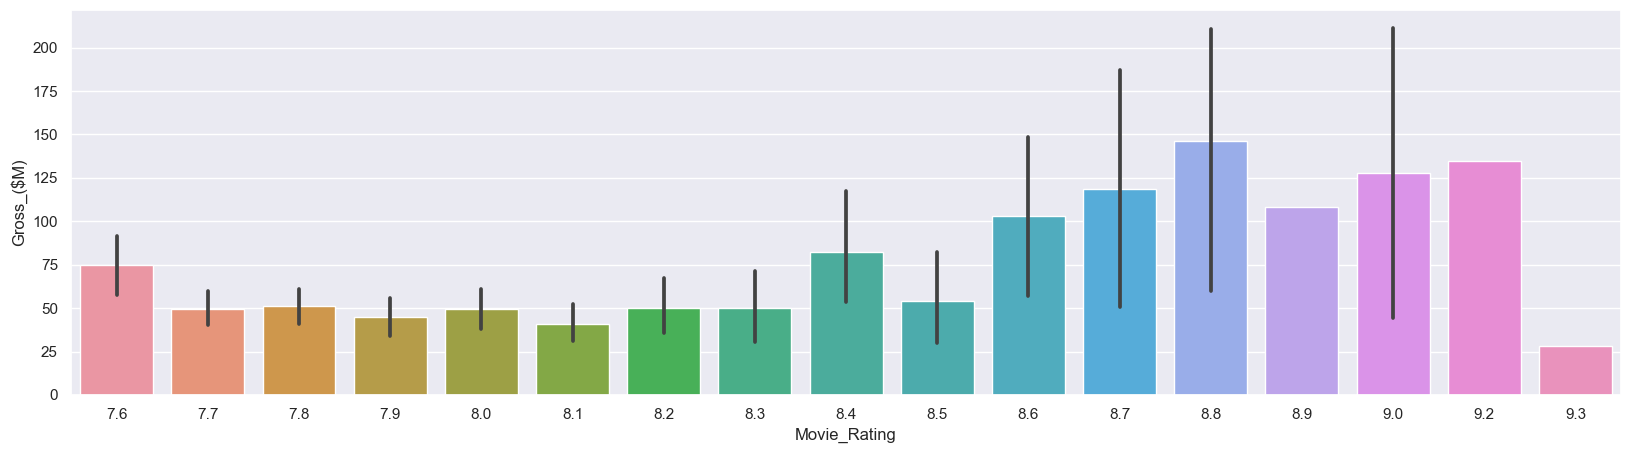

In [43]:
sns.barplot(x='Movie_Rating', y='Gross_($M)', data=df_outliers)

<AxesSubplot:xlabel='Movie_Rating', ylabel='Votes'>

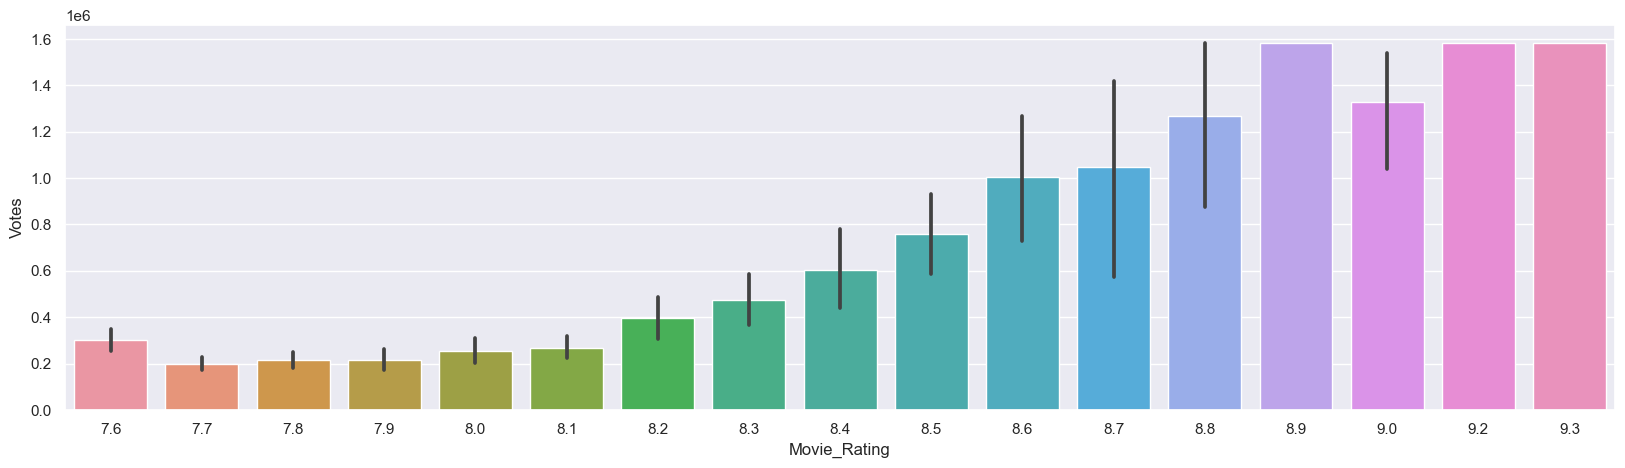

In [44]:
sns.barplot(x='Movie_Rating', y='Votes', data=df_outliers)

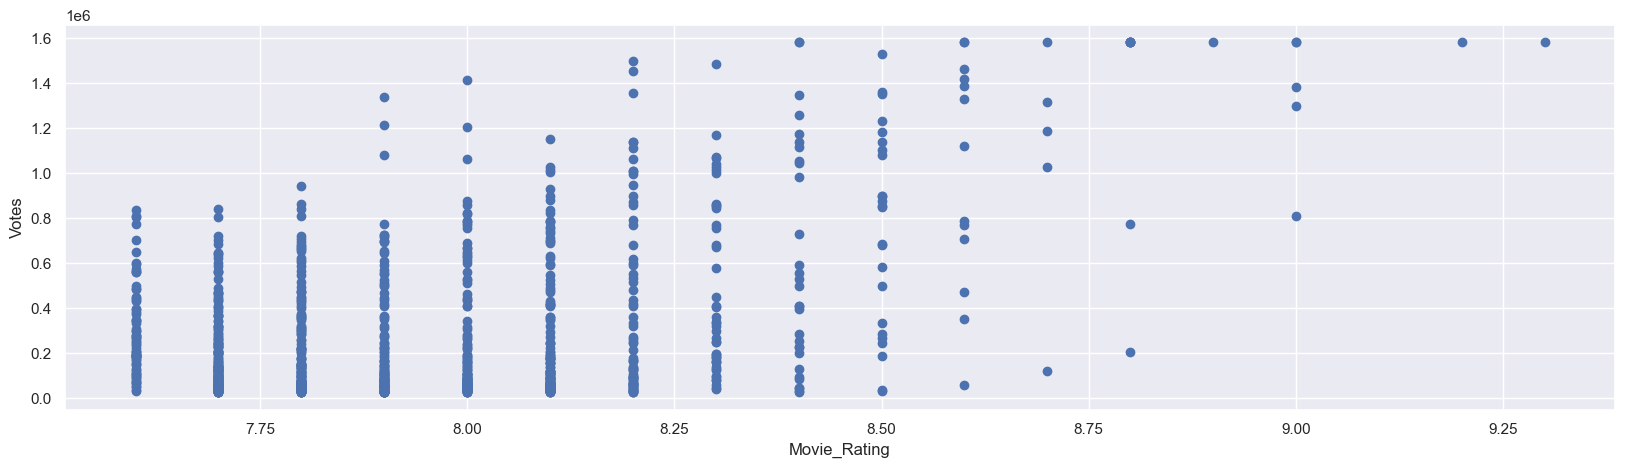

In [45]:
plt.scatter(df_outliers['Movie_Rating'], df_outliers['Votes'])
plt.xlabel("Movie_Rating")
plt.ylabel("Votes")
plt.show()

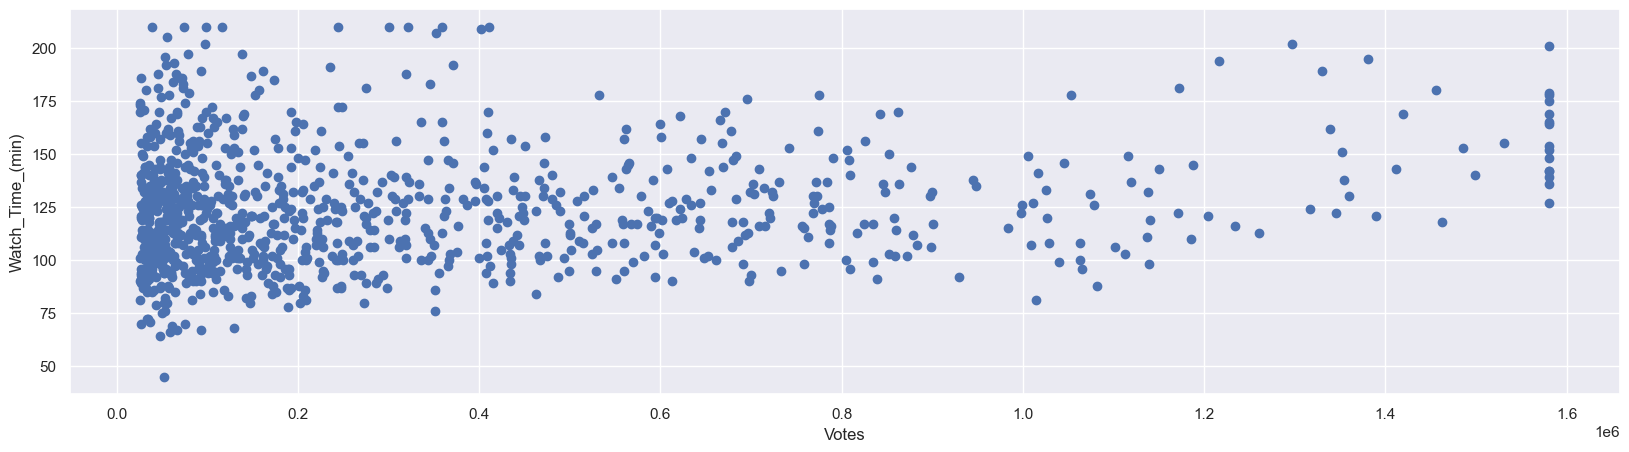

In [46]:
plt.scatter(df_outliers['Votes'], df_outliers['Watch_Time_(min)'])
plt.xlabel("Votes")
plt.ylabel("Watch_Time_(min)")
plt.show()

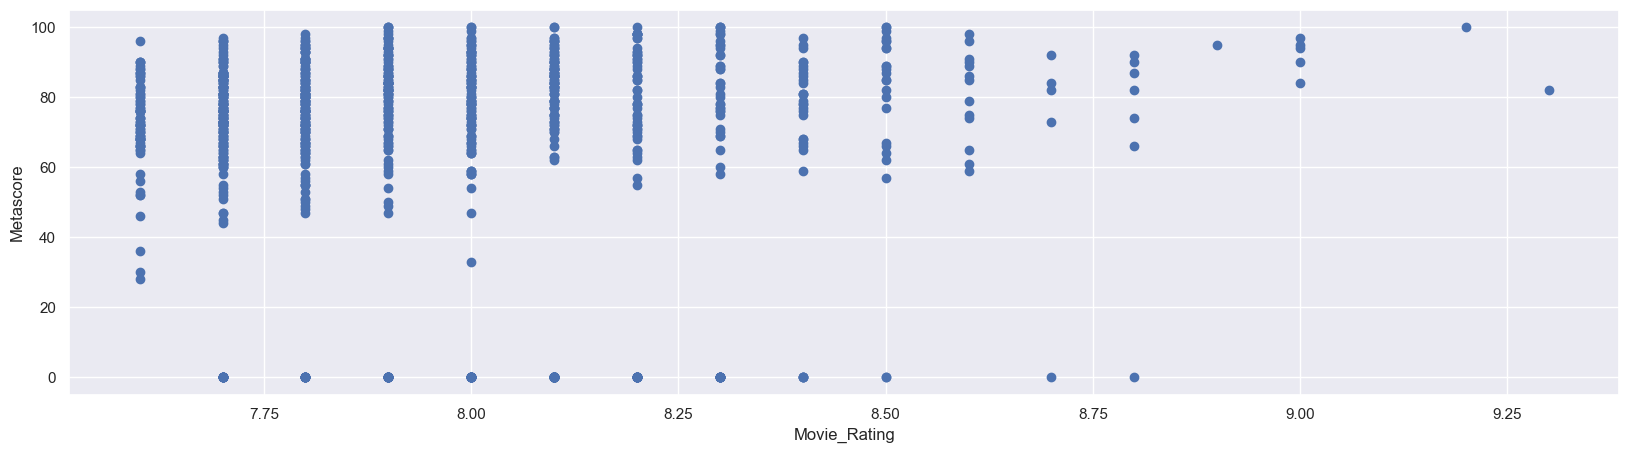

In [47]:
plt.scatter(df_outliers['Movie_Rating'], df_outliers['Metascore'])
plt.xlabel("Movie_Rating")
plt.ylabel("Metascore")
plt.show()

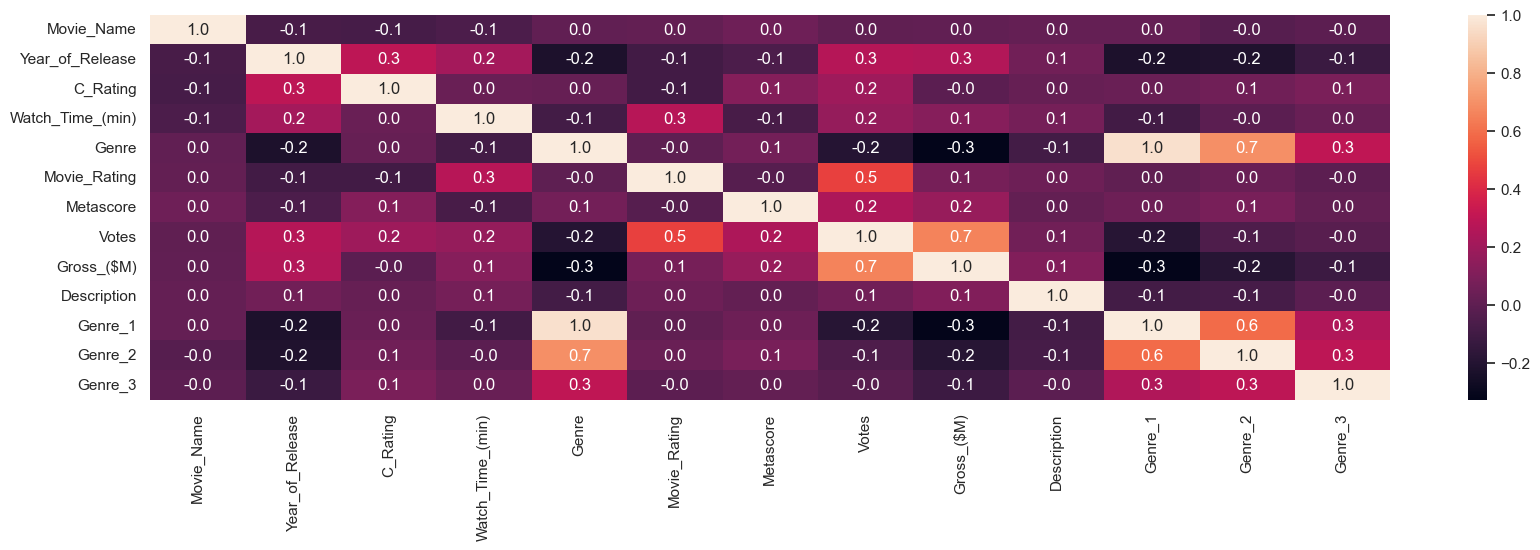

In [48]:
sns.heatmap(df_outliers.corr(), annot=True ,fmt=".1f")
plt.show()

## IV. Build models

### Split Data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state=52)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=52) # 0.25 x 0.8 = 0.2_

In [50]:
from sklearn.model_selection import cross_validate

### Random Forest

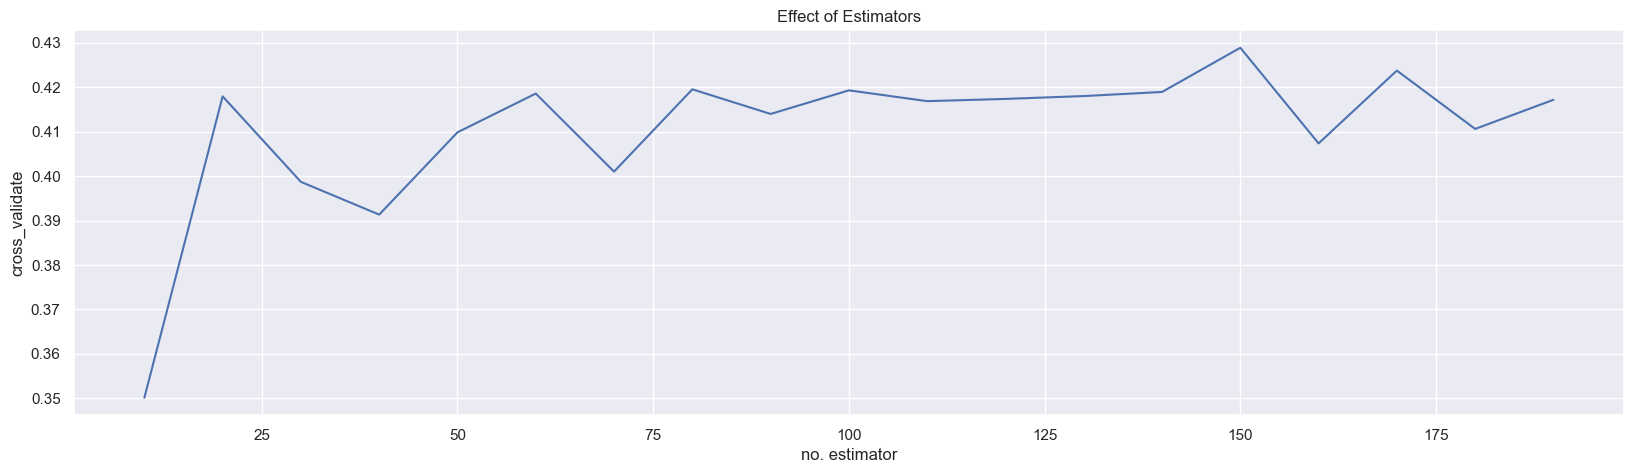

150

In [51]:
model_RF = RandomForestRegressor(n_jobs=-1)
model_RF.fit(X_train, y_train)

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model_RF.set_params(n_estimators=n)
    result = cross_validate(model_RF, X_val, y_val) # defaults to 5-fold CV
    
    scores.append(np.mean(result['test_score']))

plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("cross_validate")
plt.plot(estimators, scores)
plt.show()

best_estimators = estimators[np.argmax(scores)]
estimators[np.argmax(scores)]

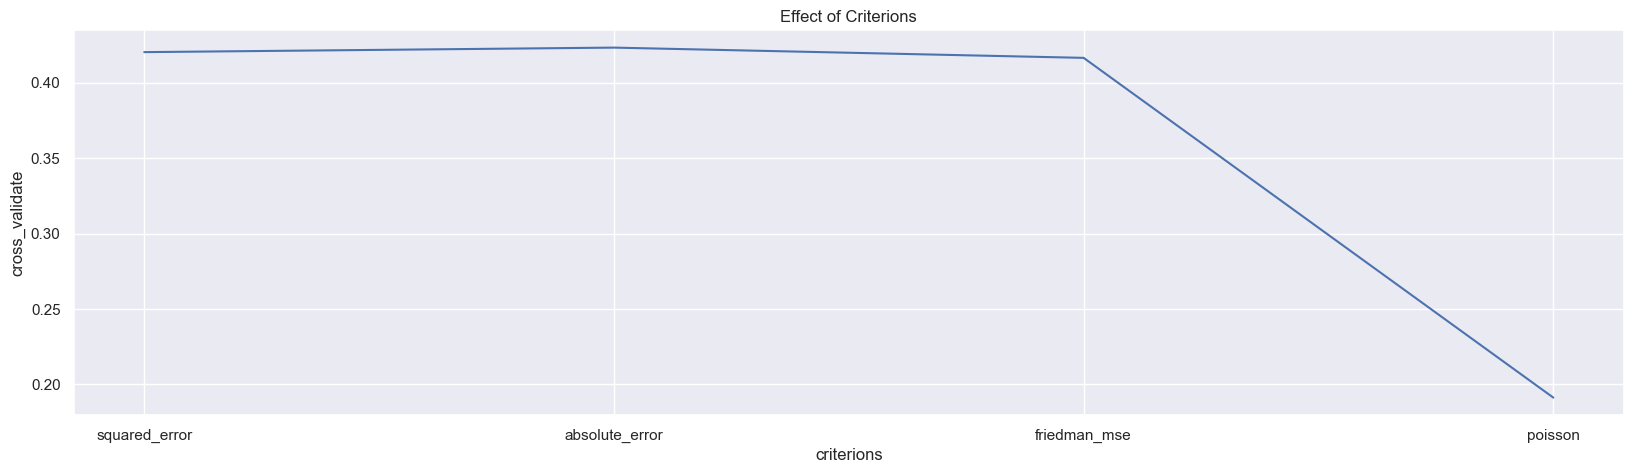

'absolute_error'

In [52]:
criterions = ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']

scores = []
for criterion in criterions:
    model_RF.set_params(criterion=criterion)
    result = cross_validate(model_RF, X_val, y_val) # defaults to 5-fold CV
    
    scores.append(np.mean(result['test_score']))

plt.title("Effect of Criterions")
plt.xlabel("criterions")
plt.ylabel("cross_validate")
plt.plot(criterions, scores)
plt.show()

best_criterion = criterions[np.argmax(scores)]
criterions[np.argmax(scores)]

### K-Nearest Neighbors

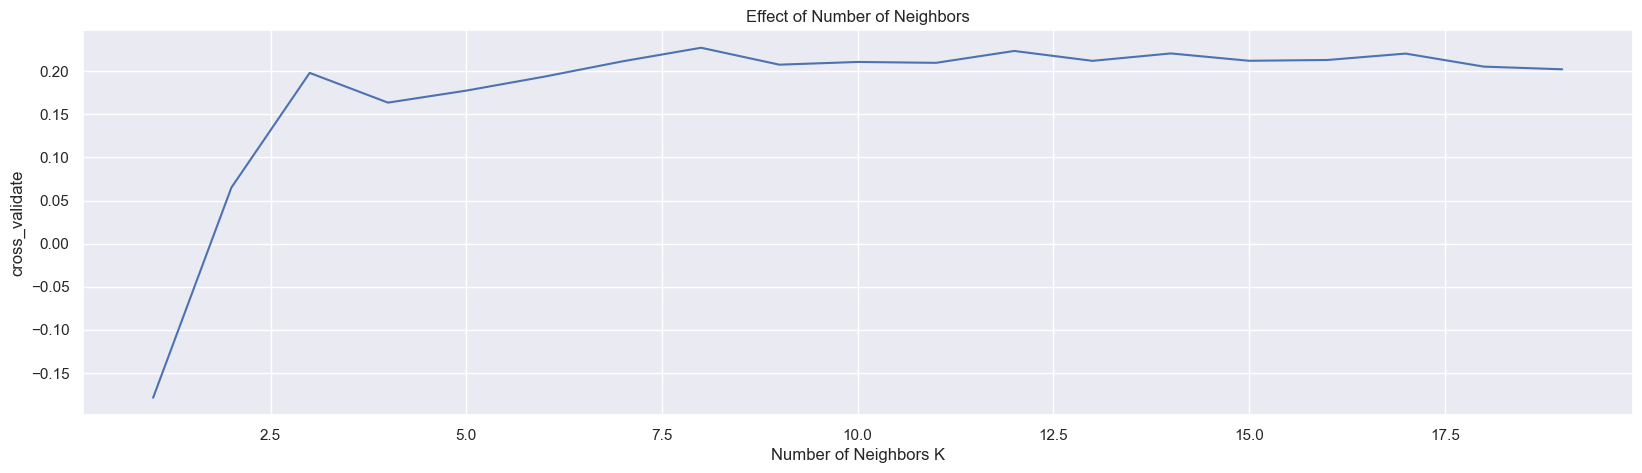

8

In [53]:
model_KNN = KNeighborsRegressor(algorithm = 'ball_tree')
model_KNN.fit(X_train, y_train)

n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model_KNN.set_params(n_neighbors=n)
    result = cross_validate(model_KNN, X_val, y_val) # defaults to 5-fold CV
    
    scores.append(np.mean(result['test_score']))

plt.title("Effect of Number of Neighbors")
plt.xlabel("Number of Neighbors K")
plt.ylabel("cross_validate")
plt.plot(n_neighbors, scores)
plt.show()

best_n_neighbors = n_neighbors[np.argmax(scores)]
n_neighbors[np.argmax(scores)]

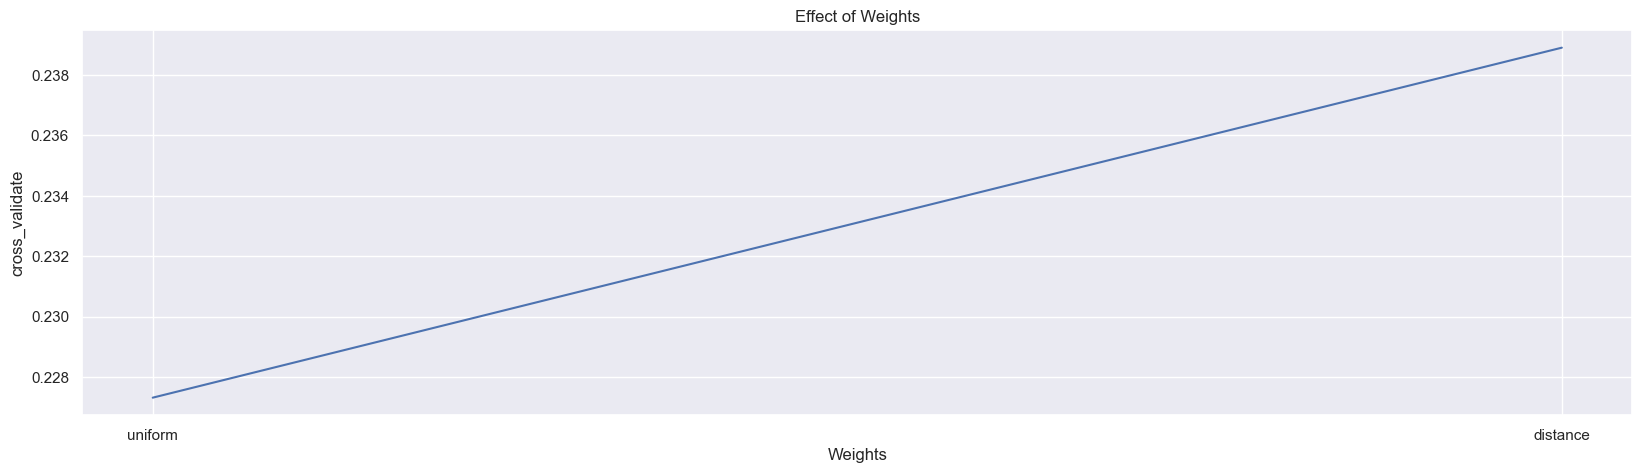

'distance'

In [54]:
weights = ['uniform', 'distance']
scores = []
for weight in weights:
    model_KNN.set_params(n_neighbors=best_n_neighbors, weights = weight)
    result = cross_validate(model_KNN, X_val, y_val) # defaults to 5-fold CV
    
    scores.append(np.mean(result['test_score']))

plt.title("Effect of Weights")
plt.xlabel("Weights")
plt.ylabel("cross_validate")
plt.plot(weights, scores)
plt.show()

best_weights = weights[np.argmax(scores)]
weights[np.argmax(scores)]

### Metrics

#### 1. Random Forest

In [55]:
model_RF = RandomForestRegressor(n_estimators=best_estimators, criterion=best_criterion, n_jobs=-1)
model_RF.fit(X_train, y_train)

predictions_RF = model_RF.predict(X_test)

In [56]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_RF)

('Mean Absolute Error:', 0.1346345177664975)

In [57]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_RF))

('Root Mean Squared Error:', 0.17152941139493022)

In [58]:
'R2 Score:', metrics.r2_score(y_test, predictions_RF)

('R2 Score:', 0.6289436995995773)

#### 2. K-Nearest Neighbors

In [59]:
model_KNN = KNeighborsRegressor(n_neighbors=best_n_neighbors, weights = best_weights, algorithm = 'ball_tree')
model_KNN.fit(X_train, y_train)

predictions_KNN = model_KNN.predict(X_test)

In [60]:
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions_KNN)

('Mean Absolute Error:', 0.1531650590535596)

In [61]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions_KNN))

('Root Mean Squared Error:', 0.18959608051053645)

In [62]:
'R2 Score:', metrics.r2_score(y_test, predictions_KNN)

('R2 Score:', 0.5466628338582302)

#### 3. Result

Text(0.5, 1.0, 'KNN')

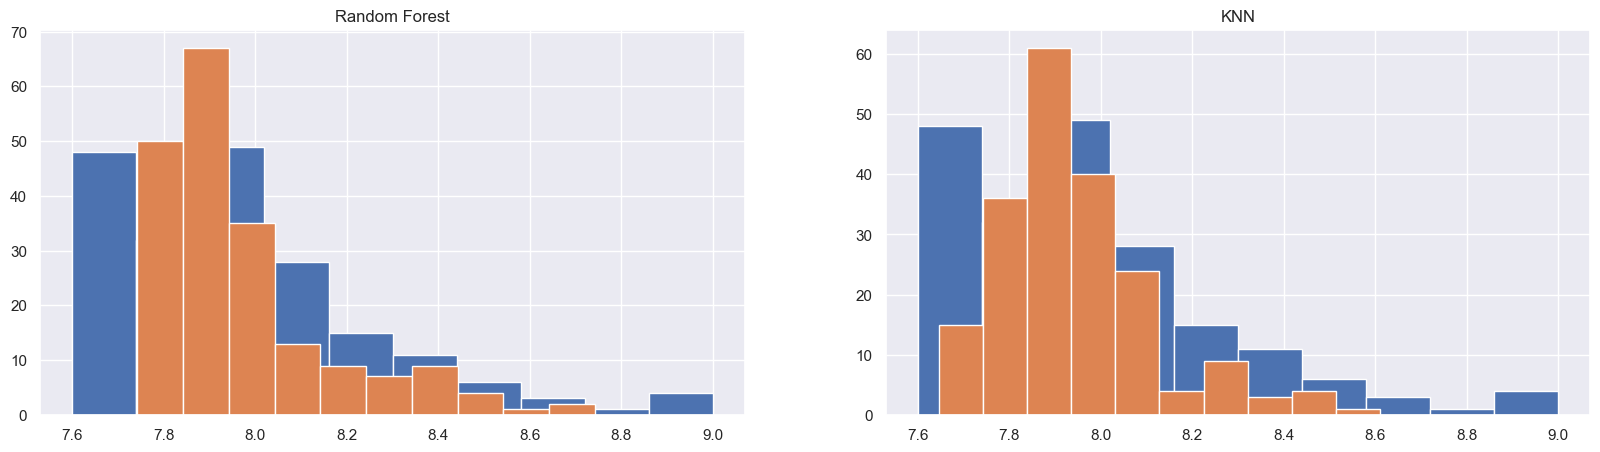

In [63]:
f, a = plt.subplots(1,2)

a[0].hist(y_test, label='y_test')
a[0].hist(predictions_RF, label='prediction_RF')


a[0].set_title('Random Forest')

a[1].hist(y_test, label='y_test')
a[1].hist(predictions_KNN, label='predictions_KNN')

a[1].set_title('KNN')